# Project 4: [Insert Project Title]
## Clustering
---

In [67]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv("https://media.githubusercontent.com/media/Rpierre98/DSI-320-Group-Project/main/data/clean_data/cleaned_data.csv")

### Preprocessing

In [42]:
df = df.replace({'POV_STS' : { 1 : 'in poverty', 0 : 'not in poverty'}})

In [43]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['AGE',
 'OUT_POCKET_NONPREM',
 'OUT_POCKET_OC',
 'WEEKS_WRK',
 'ERN_VAL',
 'EARN_TOTAL',
 'TOTAL_DIS_INC',
 'TIME_ASSIST',
 'CHLD_SUP',
 'ADJ_GROSS_INC']

In [44]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_columns

['STATE',
 'FAM_RELATIONSHIP',
 'OCCUPATION',
 'EDU_LVL',
 'MARITAL',
 'SEX',
 'HOUSEHOLD_SUMMARY',
 'MILITARY',
 'CERT_REQ',
 'TROUB_BATHE',
 'TROUB_HEAR',
 'TROUB_SEE',
 'TROUB_ALONE',
 'TROUB_WALK',
 'TROUB_CONC',
 'HISPANIC',
 'IMMIGR_YR',
 'CITIZENSHIP',
 'DISABLED',
 'RACE',
 'WORK_INDUSTRY',
 'LABOR_STATUS',
 'WRK_STATUS',
 'WRK_CLASS_LONGEST',
 'LONGEST_IND',
 'NO_WRK_RSN',
 'FT_PT',
 'EARN_SOURCE',
 'ERN_OTR',
 'WORK_DIS',
 'DIS_INC',
 'OTH_DIS_INC',
 'FIN_ASSIST',
 'OTH_INC',
 'CASH_ASSIST',
 'WIC',
 'TAX_FILE_STAT',
 'HEALTH_INS',
 'PUB_INS',
 'PRIV_INS',
 'POV_STS',
 'POV_LVL']

In [45]:
ctx = ColumnTransformer([
    ('ss', StandardScaler(), ['WEEKS_WRK', 'AGE', 'EARN_TOTAL', 'ADJ_GROSS_INC','OUT_POCKET_NONPREM', 'OUT_POCKET_OC']),
    ('ohe', OneHotEncoder(sparse_output=False), ['FAM_RELATIONSHIP', 'OCCUPATION', 'EDU_LVL', 'MARITAL', 'SEX',
                                                'MILITARY', 'HISPANIC', 'IMMIGR_YR', 'CITIZENSHIP', 'DISABLED',
                                                'RACE', 'WORK_INDUSTRY', 'LABOR_STATUS', 'WRK_STATUS', 'NO_WRK_RSN',
                                                'FT_PT', 'EARN_SOURCE', 'ERN_OTR', 'WORK_DIS', 'TAX_FILE_STAT',
                                                'HEALTH_INS', 'PUB_INS', 'PRIV_INS', 'POV_LVL', 'POV_STS'])
],verbose_feature_names_out = False)

In [46]:
X_transformed = ctx.fit_transform(df)
X_transformed = pd.DataFrame(X_transformed,columns = ctx.get_feature_names_out())

In [47]:
X_num = X_transformed[['WEEKS_WRK', 'AGE', 'EARN_TOTAL', 'ADJ_GROSS_INC','OUT_POCKET_NONPREM', 'OUT_POCKET_OC']]
X_cat = X_transformed.drop(columns = ['WEEKS_WRK', 'AGE', 'EARN_TOTAL', 'ADJ_GROSS_INC','OUT_POCKET_NONPREM',
                                      'OUT_POCKET_OC'])

In [53]:
X = df[['FAM_RELATIONSHIP', 'OCCUPATION', 'EDU_LVL', 'MARITAL', 'SEX','MILITARY', 'HISPANIC', 'IMMIGR_YR',
        'CITIZENSHIP', 'DISABLED','RACE', 'WORK_INDUSTRY', 'LABOR_STATUS', 'WRK_STATUS', 'NO_WRK_RSN',
        'FT_PT', 'EARN_SOURCE', 'ERN_OTR', 'WORK_DIS', 'TAX_FILE_STAT','HEALTH_INS', 'PUB_INS', 'PRIV_INS',
        'POV_LVL', 'POV_STS', 'WEEKS_WRK', 'AGE', 'EARN_TOTAL', 'ADJ_GROSS_INC','OUT_POCKET_NONPREM', 'OUT_POCKET_OC']]

## Numerical Clustering
---

### KMeans

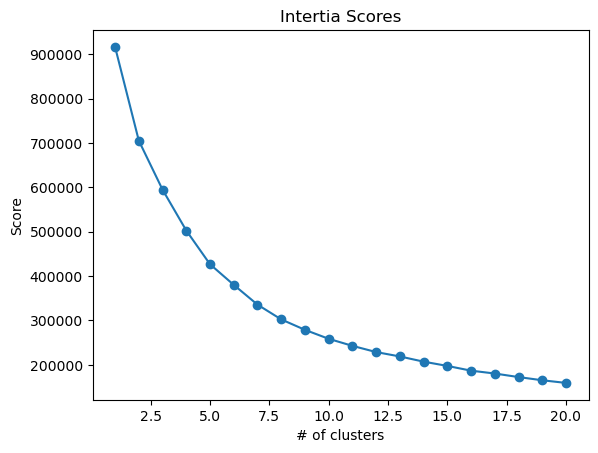

In [49]:
inertia_list = []

for k in range(1,21):
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(X_num)
    inertia_list.append(kmeans.inertia_)

plt.plot(range(1,21), inertia_list, marker = 'o')
plt.xlabel("# of clusters")
plt.ylabel("Score")
plt.title("Intertia Scores");

In [52]:
inertia_list

[916391.9999999937,
 705195.7940329512,
 594740.4304634774,
 502633.42756959656,
 426629.9585633119,
 380188.4712370871,
 335620.4694273917,
 302331.88112632255,
 278808.0066165724,
 258583.0359460342,
 242707.89285919728,
 228697.21110767024,
 218795.50769705337,
 207090.85777714624,
 197473.73987736827,
 186782.84876957416,
 180336.37770839606,
 172359.19857420766,
 165149.2600646079,
 159156.95556389345]

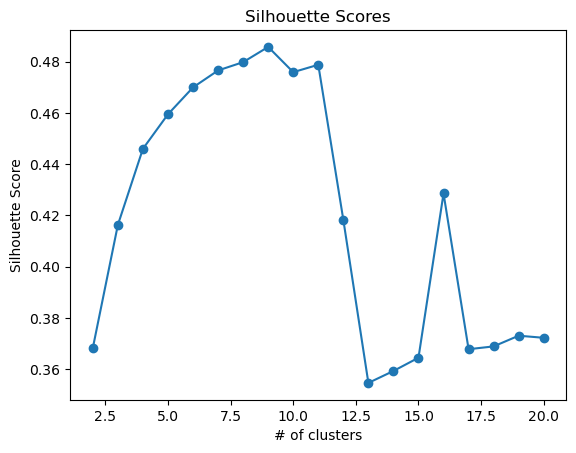

In [55]:
silhouette_list = []

for k in range(2,21):
    kmeans = KMeans(n_clusters=k,random_state = 42)
    kmeans.fit(X_num)
    silhouette_list.append(silhouette_score(X_num, kmeans.labels_))
    
plt.plot(range(2, 21), silhouette_list, marker = 'o')
plt.xlabel('# of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores');

In [56]:
silhouette_list

[0.3683077151222541,
 0.41632690432044217,
 0.44600728057030614,
 0.4594721929085186,
 0.4699539828538694,
 0.47656410426476203,
 0.47979672055974015,
 0.48573654878896033,
 0.47589150674642705,
 0.4787800801040417,
 0.4183071995463479,
 0.35469204620394923,
 0.3593471339329629,
 0.36451706855151916,
 0.42858322451652364,
 0.3678394310829727,
 0.36893601790503217,
 0.37310878110704804,
 0.3722898830166193]

In [57]:
kmeans = KMeans(n_clusters=8,random_state = 42)
kmeans.fit(X_num)
X_km = X[X_num.columns].copy()
X_km['cluster'] = kmeans.labels_

### KMeans Analysis

In [66]:
X_km.head()

,WEEKS_WRK,AGE,EARN_TOTAL,ADJ_GROSS_INC,OUT_POCKET_NONPREM,OUT_POCKET_OC,cluster
0,52,42,44200,44220,0,0,0
1,38,62,0,80349,320,48,0
2,52,64,48000,0,0,100,0
3,52,26,40000,60001,0,100,0
4,44,24,20000,0,300,100,0


In [65]:
X_km['cluster'].value_counts(normalize=True)

0    0.370472
1    0.332687
4    0.206866
2    0.059392
7    0.016002
3    0.011681
5    0.002756
6    0.000144
Name: cluster, dtype: float64

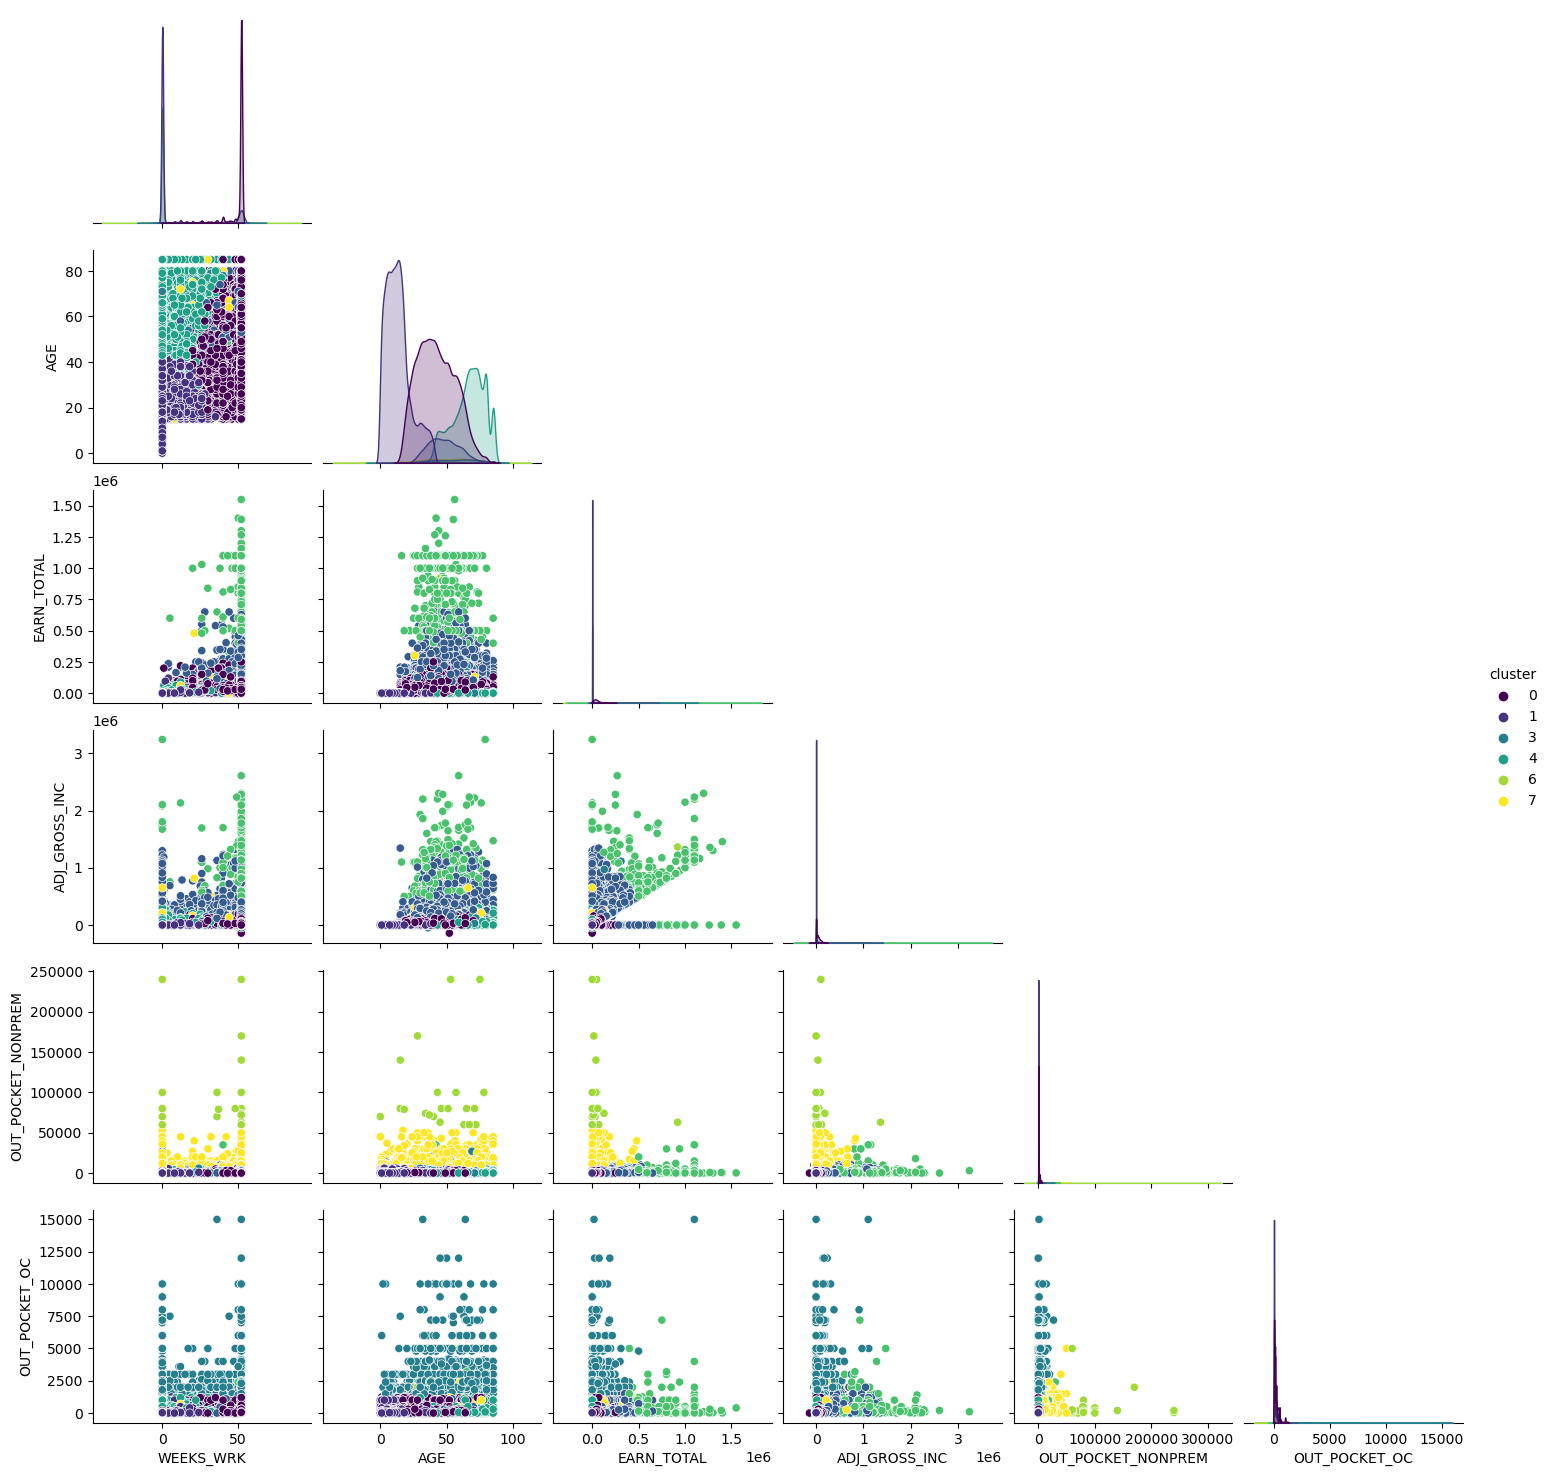

In [70]:
sns.pairplot(data = X_km, hue = 'cluster', corner = True, palette = 'viridis');

### DBScan

### DBScan Analysis

### Spectral Clustering

### Spectral Clustering Analysis

## Categorical Clustering
---

### KModes

In [ ]:
#pip install --upgrade kmodes
#in terminal
#Source - https://pypi.org/project/kmodes/
'''
k-modes is used for clustering categorical variables.
It defines clusters based on the number of matching categories between data points.
(This is in contrast to the more well-known k-means algorithm, which clusters numerical data based on Euclidean distance.)
The k-prototypes algorithm combines k-modes and k-means and is able to cluster mixed numerical / categorical data.
'''

## Mixed Clustering
---

### K-Prototype

## Clustering Conclusions